In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from utils import *

In [4]:
train_x = pd.read_csv(Path(processed_path, "dataset_for_2022.csv"))
train_y = train_x[["price"]]
train_x = train_x[list(train_x.columns)[:-1]]
train_x, test_x, train_y, test_y = train_test_split(train_x.values, train_y.values, random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)


(11944, 50) (3982, 50) (11944, 1) (3982, 1)


/home/sadid/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
estimator = load_object("lgb")

In [7]:
y_hat = estimator.predict(test_x)

In [8]:
print("rmse", np.sqrt(mean_squared_error(y_hat, np.array(test_y).ravel())))
print("mse", mean_squared_error(y_hat, np.array(test_y).ravel()))
print("mape", mean_absolute_percentage_error(y_hat, np.array(test_y).ravel()))
print("mae", mean_absolute_error(y_hat, np.array(test_y).ravel()))

rmse 22566.194147284474
mse 509233118.29293597
mape 1.708785165647157
mae 5240.409170389046


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
sorted_idxs = np.argsort(test_y.ravel())
sorted_idxs[:5]

array([3338, 3452,  686, 2188,  593])

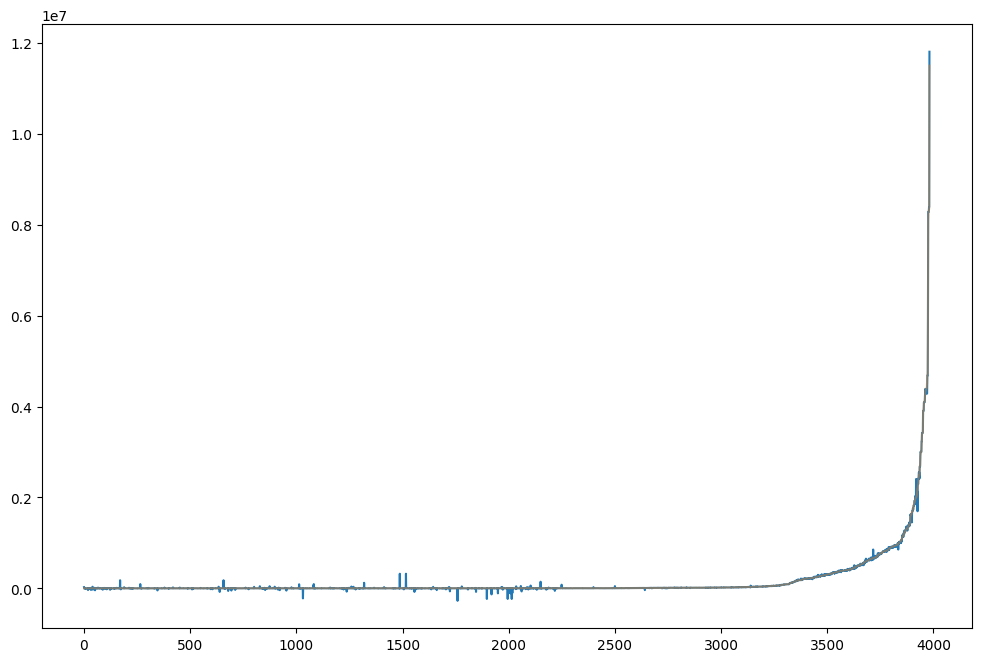

In [16]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(range(len(y_hat)), y_hat[sorted_idxs], alpha=0.99)
plt.plot(range(len(y_hat)), test_y.ravel()[sorted_idxs], alpha=0.4)